### IS THERE A CORRELATION BETWEEN LEVELS OF DEPRIVATION AND THE AVAILABILITY OF CENTRAL HEATING IN DIFFERENT AREAS IN LEEDS?

### Introduction
According to the UK Department for Energy Security and Net Zero, around 13% of households in 2021, equivalent to approximately 3.2 million households, lacked central heating (NSO, 2023). Previous studies by Callan et al. (1993) and Dunphy et al. (2024) have identified financial deprivation as a significant factor contributing to the absence of central heating systems. Understanding the correlation between deprivation and central heating within specific areas is crucial for effectively allocating heating resources to improve central heating accessibility. Additionally, it helps in determining the type of central heating infrastructure that is affordable for different area types based on their financial capabilities.

This study investigates and visualizes the relationship between central heating and deprivation in the county of Leeds, focusing on Lower Super Output Areas (LSOAs). Census data from the 2011 UK Census is used to assess both deprivation and central heating availability since 2021 census data on central heating was not publicly available during the study period.

Deprivation in Leeds LSOAs is categorized into five levels based on four dimensions: education, health, employment, and housing (NSO, 2012). These levels include:
1. No deprivation: Households not deprived in any dimension.
2. Low deprivation: Households deprived in one dimension.
3. Moderate deprivation: Households deprived in two dimensions.
4. High deprivation: Households deprived in three dimensions.
5. Severe deprivation: Households deprived in four dimens

The Census dataset on deprivation and central heating availability was downloaded from the Infuse UK Data Service (NSO, 2011), while Leeds LSOA and ward boundaries data was downloaded from the Open Geography Portal of the Office of National Statistics (ONS, 2011). 

ions.
   
The dataset for this study includes data on the number of households falling into each deprivation level for each LSOA in Leeds, as well as data on the number of households with central heating i
n each LSOA.
After cleaning the data, percentages for each data column have been calculated. The correlation between deprivation variables and central heating availability has been assessed, followed by visualization of the lowest deprivation variable against the central heating availability variable through a scatter plot. Finally, the highest level of deprivation has been mapped against central heating availability to spatially visualize this relationship acrossLeeds LSOAs.


### Importing required packages

In [1]:
import geopandas as gpd               # Imports the geopandas library and assigns it the nickname 'gpd'
import pandas as pd                   # Imports the pandas library and assigns it the nickname 'pd'
import seaborn as sns                 # Imports the seaborn library and assigns it the nickname 'sns'
from scipy import stats               # Imports the stats module from the scipy library
import numpy as np                    # Imports the numpy library and assigns it the nickname 'np'
import matplotlib.pyplot as plt      # Imports the pyplot module from the matplotlib library and assigns it the nickname 'plt'
from matplotlib.colors import LinearSegmentedColormap   # Imports the LinearSegmentedColormap class from the matplotlib.colors module
import contextily as ctx              # Imports the contextily library and assigns it the nickname 'ctx'
from mpl_toolkits.axes_grid1 import make_axes_locatable  # Imports the make_axes_locatable function from the mpl_toolkits.axes_grid1 module
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset  # Imports the inset_axes and mark_inset functions from the mpl_toolkits.axes_grid1.inset_locator module
from matplotlib_scalebar.scalebar import ScaleBar        # Imports the ScaleBar class from the matplotlib_scalebar.scalebar module
from matplotlib.patches import FancyArrowPatch           # Imports the FancyArrowPatch class from the matplotlib.patches module


### Read and Explore Data on Central Heating in Leeds LSOAs

In [2]:
#Read in data of central heating in Leads LSOAs
leeds_heating=pd.read_csv("C:/Users/fuley/OneDrive - University of Leeds/Documents/5990GEOG/final_project/centralHeating_Leeds.csv")

#Explore first five rows columns
leeds_heating.head()

,CDU_ID,GEO_CODE,GEO_LABEL,GEO_TYPE,GEO_TYP2,F2344,F2345,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,Central heating in household; type of : No cen...,Central heating in household; type of : Does h...,NaN
1,367.0,E08000035,Leeds,Local Authorities,LA,17025,303571,NaN
2,30210.0,E01011264,Leeds 011A,Lower Super Output Areas and Data Zones,LSOADZ,37,528,NaN
3,30211.0,E01011265,Leeds 009A,Lower Super Output Areas and Data Zones,LSOADZ,31,717,NaN
4,30212.0,E01011266,Leeds 008A,Lower Super Output Areas and Data Zones,LSOADZ,22,871,NaN


In [3]:
leeds_heating.columns # checking all column lables

Index(['CDU_ID', 'GEO_CODE', 'GEO_LABEL', 'GEO_TYPE', 'GEO_TYP2', 'F2344',
       'F2345', 'Unnamed: 7'],
      dtype='object')

In [4]:
# Renaming some columns to sensible names
#Defining a dictionary to map old column names to new column names
column_name_mapping = {'F2344':'No central heating', 'F2345':'Have central heating'}

# Rename columns using the dictionary
leeds_heating = leeds_heating.rename(columns=column_name_mapping)

# Display the DataFrame with renamed columns
print("\nDataFrame with Renamed Columns:")
leeds_heating.head()


DataFrame with Renamed Columns:


,CDU_ID,GEO_CODE,GEO_LABEL,GEO_TYPE,GEO_TYP2,No central heating,Have central heating,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,Central heating in household; type of : No cen...,Central heating in household; type of : Does h...,NaN
1,367.0,E08000035,Leeds,Local Authorities,LA,17025,303571,NaN
2,30210.0,E01011264,Leeds 011A,Lower Super Output Areas and Data Zones,LSOADZ,37,528,NaN
3,30211.0,E01011265,Leeds 009A,Lower Super Output Areas and Data Zones,LSOADZ,31,717,NaN
4,30212.0,E01011266,Leeds 008A,Lower Super Output Areas and Data Zones,LSOADZ,22,871,NaN


In [5]:
# Drop the first and second rows
leeds_heating = leeds_heating.iloc[2:]

# Drop the last column
leeds_heating = leeds_heating.iloc[:, :-1]

leeds_heating.head() # display first 5 rows to check

,CDU_ID,GEO_CODE,GEO_LABEL,GEO_TYPE,GEO_TYP2,No central heating,Have central heating
2,30210.0,E01011264,Leeds 011A,Lower Super Output Areas and Data Zones,LSOADZ,37,528
3,30211.0,E01011265,Leeds 009A,Lower Super Output Areas and Data Zones,LSOADZ,31,717
4,30212.0,E01011266,Leeds 008A,Lower Super Output Areas and Data Zones,LSOADZ,22,871
5,30213.0,E01011267,Leeds 009B,Lower Super Output Areas and Data Zones,LSOADZ,41,625
6,30214.0,E01011268,Leeds 010A,Lower Super Output Areas and Data Zones,LSOADZ,77,538


In [6]:
leeds_heating.info() #Checking for data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 2 to 483
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CDU_ID                482 non-null    float64
 1   GEO_CODE              482 non-null    object 
 2   GEO_LABEL             482 non-null    object 
 3   GEO_TYPE              482 non-null    object 
 4   GEO_TYP2              482 non-null    object 
 5   No central heating    482 non-null    object 
 6   Have central heating  482 non-null    object 
dtypes: float64(1), object(6)
memory usage: 26.5+ KB


There are no missing values. However, the data type for columns of 'No central heating' and 'Have central heating' is object when infact it has to be integers since these columns represent number of households with and or without central heating in each LSOA

In [7]:
#change data type for columns of 'no central heating' and 'have central heating' from object to integer
columns_to_convert = ['No central heating', 'Have central heating']
leeds_heating[columns_to_convert] = leeds_heating[columns_to_convert].astype(int)

#rechecking data type
leeds_heating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 2 to 483
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CDU_ID                482 non-null    float64
 1   GEO_CODE              482 non-null    object 
 2   GEO_LABEL             482 non-null    object 
 3   GEO_TYPE              482 non-null    object 
 4   GEO_TYP2              482 non-null    object 
 5   No central heating    482 non-null    int32  
 6   Have central heating  482 non-null    int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 22.7+ KB


The columns on central heating availability are now in the right data type of integers

In [8]:
#create columns of percentages for those with central heating and those without central heating
# Calculate percentages and create a new column
leeds_heating['% No central heating'] = (leeds_heating['No central heating'] / (leeds_heating['No central heating']+leeds_heating['Have central heating'])) * 100
leeds_heating['% Have central heating'] = (leeds_heating['Have central heating'] / (leeds_heating['No central heating']+leeds_heating['Have central heating'])) * 100

#display
leeds_heating.head()

,CDU_ID,GEO_CODE,GEO_LABEL,GEO_TYPE,GEO_TYP2,No central heating,Have central heating,% No central heating,% Have central heating
2,30210.0,E01011264,Leeds 011A,Lower Super Output Areas and Data Zones,LSOADZ,37,528,6.548673,93.451327
3,30211.0,E01011265,Leeds 009A,Lower Super Output Areas and Data Zones,LSOADZ,31,717,4.144385,95.855615
4,30212.0,E01011266,Leeds 008A,Lower Super Output Areas and Data Zones,LSOADZ,22,871,2.463606,97.536394
5,30213.0,E01011267,Leeds 009B,Lower Super Output Areas and Data Zones,LSOADZ,41,625,6.156156,93.843844
6,30214.0,E01011268,Leeds 010A,Lower Super Output Areas and Data Zones,LSOADZ,77,538,12.520325,87.479675


With percentages calculated, all analyses will be done on the percentages and as such we can delete the other columns to keep our dataset neat and ease to use

In [9]:
#Deleting some columns from the leeds_heating dataset before merging it with the deprivation data. This is just to avoid redundancy in many columns except the joinig column
# Columns to be deleted
columns_to_delete = ['CDU_ID', 'GEO_LABEL', 'GEO_TYPE', 'GEO_TYP2', 'No central heating', 'Have central heating', '% No central heating']

# Deleting columns
leeds_heating.drop(columns=columns_to_delete, inplace=True)

In [10]:
#check data columns to confirm deletion
leeds_heating.columns

Index(['GEO_CODE', '% Have central heating'], dtype='object')

In [11]:
#summary statistics for the numerical variable
leeds_heating.describe()

,% Have central heating
count,482.000000
mean,94.800216
std,3.537082
min,78.991597
25%,92.896014
50%,95.605228
75%,97.524376
max,99.708029


### Read and Explore Data on Deprivation in Leeds LSOAs

In [12]:
#Read in data of Deprivation levels in Leeds LSOAs
leeds_deprivation=pd.read_csv("C:/Users/fuley/OneDrive - University of Leeds/Documents/5990GEOG/final_project/Leeds_deprivation.csv")

#display first 5 rows
leeds_deprivation.head()

,CDU_ID,GEO_CODE,GEO_LABEL,GEO_TYPE,GEO_TYP2,F997,F998,F999,F1000,F1001,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,Deprivation; classification of household [E][S...,Deprivation; classification of household [E][S...,Deprivation; classification of household [E][S...,Deprivation; classification of household [E][S...,Deprivation; classification of household [E][S...,NaN
1,367.0,E08000035,Leeds,Local Authorities,LA,133802,103214,62541,18854,2185,NaN
2,30210.0,E01011264,Leeds 011A,Lower Super Output Areas and Data Zones,LSOADZ,239,176,122,26,2,NaN
3,30211.0,E01011265,Leeds 009A,Lower Super Output Areas and Data Zones,LSOADZ,368,220,128,32,0,NaN
4,30212.0,E01011266,Leeds 008A,Lower Super Output Areas and Data Zones,LSOADZ,608,218,54,13,0,NaN


In [13]:
#check all column names
leeds_deprivation.columns

Index(['CDU_ID', 'GEO_CODE', 'GEO_LABEL', 'GEO_TYPE', 'GEO_TYP2', 'F997',
       'F998', 'F999', 'F1000', 'F1001', 'Unnamed: 10'],
      dtype='object')

In [14]:
# Renaming some columns to sensible names
#Defining a dictionary to map old column names to new column names
column_name_mapping = {'F997':'No deprivation', 'F998':'Low deprivation', 'F999': 'Moderate deprivation', 'F1000':'High deprivation', 'F1001':'Severe deprivation'}

# Rename columns using the dictionary
leeds_deprivation = leeds_deprivation.rename(columns=column_name_mapping)

# Display the DataFrame with renamed columns
print("\nDataFrame with Renamed Columns:")
leeds_deprivation.head()


DataFrame with Renamed Columns:


,CDU_ID,GEO_CODE,GEO_LABEL,GEO_TYPE,GEO_TYP2,No deprivation,Low deprivation,Moderate deprivation,High deprivation,Severe deprivation,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,Deprivation; classification of household [E][S...,Deprivation; classification of household [E][S...,Deprivation; classification of household [E][S...,Deprivation; classification of household [E][S...,Deprivation; classification of household [E][S...,NaN
1,367.0,E08000035,Leeds,Local Authorities,LA,133802,103214,62541,18854,2185,NaN
2,30210.0,E01011264,Leeds 011A,Lower Super Output Areas and Data Zones,LSOADZ,239,176,122,26,2,NaN
3,30211.0,E01011265,Leeds 009A,Lower Super Output Areas and Data Zones,LSOADZ,368,220,128,32,0,NaN
4,30212.0,E01011266,Leeds 008A,Lower Super Output Areas and Data Zones,LSOADZ,608,218,54,13,0,NaN


In [15]:
# Drop the first and second rows
leeds_deprivation = leeds_deprivation.iloc[2:]

# Drop the last column
leeds_deprivation = leeds_deprivation.iloc[:, :-1]

#display
leeds_deprivation.head()

,CDU_ID,GEO_CODE,GEO_LABEL,GEO_TYPE,GEO_TYP2,No deprivation,Low deprivation,Moderate deprivation,High deprivation,Severe deprivation
2,30210.0,E01011264,Leeds 011A,Lower Super Output Areas and Data Zones,LSOADZ,239,176,122,26,2
3,30211.0,E01011265,Leeds 009A,Lower Super Output Areas and Data Zones,LSOADZ,368,220,128,32,0
4,30212.0,E01011266,Leeds 008A,Lower Super Output Areas and Data Zones,LSOADZ,608,218,54,13,0
5,30213.0,E01011267,Leeds 009B,Lower Super Output Areas and Data Zones,LSOADZ,252,217,161,31,5
6,30214.0,E01011268,Leeds 010A,Lower Super Output Areas and Data Zones,LSOADZ,193,211,137,67,7


In [16]:
leeds_deprivation.info() #Check missing data and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 2 to 483
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CDU_ID                482 non-null    float64
 1   GEO_CODE              482 non-null    object 
 2   GEO_LABEL             482 non-null    object 
 3   GEO_TYPE              482 non-null    object 
 4   GEO_TYP2              482 non-null    object 
 5   No deprivation        482 non-null    object 
 6   Low deprivation       482 non-null    object 
 7   Moderate deprivation  482 non-null    object 
 8   High deprivation      482 non-null    object 
 9   Severe deprivation    482 non-null    object 
dtypes: float64(1), object(9)
memory usage: 37.8+ KB


No missing values, but columns on levels of deprivation have data type as object but have to be integers since these are numbers of households.

In [17]:
#change data type for all five columns of deprivation from object to integer
columns_to_convert = ['No deprivation', 'Low deprivation', 'Moderate deprivation', 'High deprivation', 'Severe deprivation']
leeds_deprivation[columns_to_convert] = leeds_deprivation[columns_to_convert].astype(int)

#rechecking data type
leeds_deprivation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 2 to 483
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CDU_ID                482 non-null    float64
 1   GEO_CODE              482 non-null    object 
 2   GEO_LABEL             482 non-null    object 
 3   GEO_TYPE              482 non-null    object 
 4   GEO_TYP2              482 non-null    object 
 5   No deprivation        482 non-null    int32  
 6   Low deprivation       482 non-null    int32  
 7   Moderate deprivation  482 non-null    int32  
 8   High deprivation      482 non-null    int32  
 9   Severe deprivation    482 non-null    int32  
dtypes: float64(1), int32(5), object(4)
memory usage: 28.4+ KB


In [18]:
#create columns of percentages for all five columns of levels of deprivation

#first calculate column of  total households
leeds_deprivation['Total households'] = (leeds_deprivation['No deprivation'] + 
                                         leeds_deprivation['Low deprivation'] + 
                                         leeds_deprivation['Moderate deprivation'] + 
                                         leeds_deprivation['High deprivation'] + 
                                         leeds_deprivation['Severe deprivation'])

# Calculate percentages and create new columns
leeds_deprivation['% No deprivation'] = (leeds_deprivation['No deprivation'] / leeds_deprivation['Total households']) * 100
leeds_deprivation['% Low deprivation'] = (leeds_deprivation['Low deprivation'] / leeds_deprivation['Total households']) * 100    
leeds_deprivation['% Moderate deprivation'] = (leeds_deprivation['Moderate deprivation'] / leeds_deprivation['Total households']) * 100  
leeds_deprivation['% High deprivation'] = (leeds_deprivation['High deprivation'] / leeds_deprivation['Total households']) * 100  
leeds_deprivation['% Severe deprivation'] = (leeds_deprivation['Severe deprivation'] / leeds_deprivation['Total households']) * 100 

#display
leeds_deprivation.head()

,CDU_ID,GEO_CODE,GEO_LABEL,GEO_TYPE,GEO_TYP2,No deprivation,Low deprivation,Moderate deprivation,High deprivation,Severe deprivation,Total households,% No deprivation,% Low deprivation,% Moderate deprivation,% High deprivation,% Severe deprivation
2,30210.0,E01011264,Leeds 011A,Lower Super Output Areas and Data Zones,LSOADZ,239,176,122,26,2,565,42.300885,31.150442,21.592920,4.601770,0.353982
3,30211.0,E01011265,Leeds 009A,Lower Super Output Areas and Data Zones,LSOADZ,368,220,128,32,0,748,49.197861,29.411765,17.112299,4.278075,0.000000
4,30212.0,E01011266,Leeds 008A,Lower Super Output Areas and Data Zones,LSOADZ,608,218,54,13,0,893,68.085106,24.412094,6.047032,1.455767,0.000000
5,30213.0,E01011267,Leeds 009B,Lower Super Output Areas and Data Zones,LSOADZ,252,217,161,31,5,666,37.837838,32.582583,24.174174,4.654655,0.750751
6,30214.0,E01011268,Leeds 010A,Lower Super Output Areas and Data Zones,LSOADZ,193,211,137,67,7,615,31.382114,34.308943,22.276423,10.894309,1.138211


Only the newly generated columns of percentages were used for the analyses, as such other columns were deleted before merging the data with the central heating data.

In [19]:
#Deleting some columns from the leeds_deprivation dataset before merging it with the central heating data. 
# Columns to be deleted
columns_to_delete = ['CDU_ID', 'GEO_TYPE', 'GEO_TYP2', 'No deprivation', 'Low deprivation', 'Moderate deprivation', 'Total households', 'High deprivation', 'Severe deprivation']

# Deleting columns
leeds_deprivation.drop(columns=columns_to_delete, inplace=True)

In [20]:
#Checking column deletion
leeds_deprivation.head()

,GEO_CODE,GEO_LABEL,% No deprivation,% Low deprivation,% Moderate deprivation,% High deprivation,% Severe deprivation
2,E01011264,Leeds 011A,42.300885,31.150442,21.592920,4.601770,0.353982
3,E01011265,Leeds 009A,49.197861,29.411765,17.112299,4.278075,0.000000
4,E01011266,Leeds 008A,68.085106,24.412094,6.047032,1.455767,0.000000
5,E01011267,Leeds 009B,37.837838,32.582583,24.174174,4.654655,0.750751
6,E01011268,Leeds 010A,31.382114,34.308943,22.276423,10.894309,1.138211


In [21]:
#summary statistics for all numerical variables
leeds_deprivation.describe()

,% No deprivation,% Low deprivation,% Moderate deprivation,% High deprivation,% Severe deprivation
count,482.000000,482.000000,482.000000,482.000000,482.000000
mean,42.060802,32.102585,19.361419,5.806467,0.668727
std,13.580075,4.758740,7.443886,4.067864,0.726567
min,15.384615,21.412301,4.890605,0.000000,0.000000
25%,29.787328,29.411765,13.276097,2.360562,0.154381
50%,43.286645,31.725082,19.463600,4.433596,0.448772
75%,53.066057,34.113028,25.352528,8.918012,1.048961
max,72.070312,63.237311,38.380282,17.082534,4.727794


### Merging deprivation and central heating data and visualizing their correlation (non spatial)

In [22]:
#Merge the Leeds_deprivation and central heating datasets
merged_deprivation_heating = pd.merge(leeds_deprivation, leeds_heating, on='GEO_CODE', how='inner')

#display/check
merged_deprivation_heating.head()

,GEO_CODE,GEO_LABEL,% No deprivation,% Low deprivation,% Moderate deprivation,% High deprivation,% Severe deprivation,% Have central heating
0,E01011264,Leeds 011A,42.300885,31.150442,21.592920,4.601770,0.353982,93.451327
1,E01011265,Leeds 009A,49.197861,29.411765,17.112299,4.278075,0.000000,95.855615
2,E01011266,Leeds 008A,68.085106,24.412094,6.047032,1.455767,0.000000,97.536394
3,E01011267,Leeds 009B,37.837838,32.582583,24.174174,4.654655,0.750751,93.843844
4,E01011268,Leeds 010A,31.382114,34.308943,22.276423,10.894309,1.138211,87.479675


In [23]:
# Calculate Spearman's rank correlation
deprivation_heating_cor =merged_deprivation_heating[['% No deprivation',
                              '% Low deprivation',
                              '% Moderate deprivation',
                              '% High deprivation',
                              '% Severe deprivation',
                              '% Have central heating'
                             ]].corr(method = 'spearman')
deprivation_heating_cor #calling the correlation function

,% No deprivation,% Low deprivation,% Moderate deprivation,% High deprivation,% Severe deprivation,% Have central heating
% No deprivation,1.000000,-0.647190,-0.922639,-0.873678,-0.756852,0.620692
% Low deprivation,-0.647190,1.000000,0.414099,0.360509,0.323506,-0.343716
% Moderate deprivation,-0.922639,0.414099,1.000000,0.859150,0.719783,-0.527383
% High deprivation,-0.873678,0.360509,0.859150,1.000000,0.834341,-0.644218
% Severe deprivation,-0.756852,0.323506,0.719783,0.834341,1.000000,-0.672465
% Have central heating,0.620692,-0.343716,-0.527383,-0.644218,-0.672465,1.000000


### The correlation
The analysis focuses on the correlation between deprivation levels and central heating availability, emphasizing the final column of the correlation table, '% Have central heating'. A negative correlation is observed between deprivation levels and central heating, indicating reduced availability as deprivation increases. Severe deprivation areas are anticipated to have lower central heating availability, while regions with no deprivation exhibit a strong positive correlation, suggesting higher availability. This relationship is illustrated through a scatter plot.

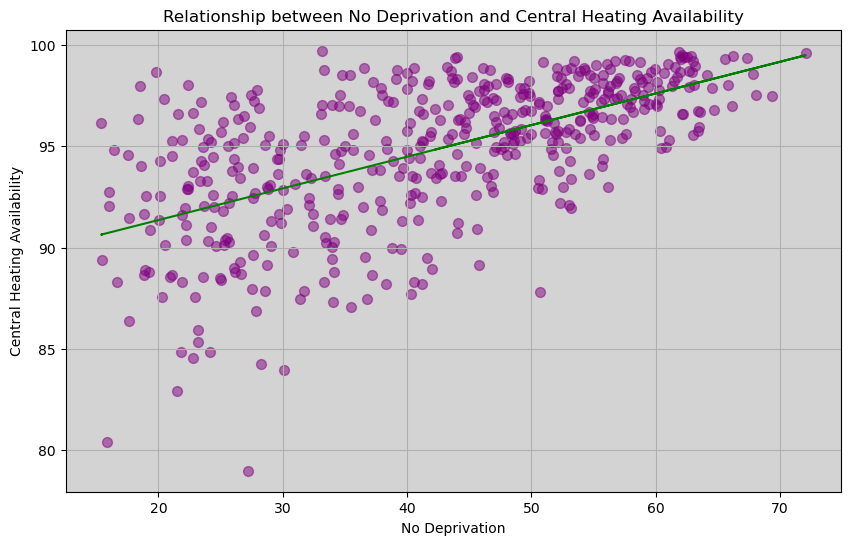

In [24]:
# Create scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size for the plot

# Calculate and plot line of best fit
coefficients = np.polyfit(merged_deprivation_heating['% No deprivation'],  # Calculate polynomial coefficients for best fit line
                          merged_deprivation_heating['% Have central heating'], 1)  # Degree 1 polynomial
line_of_best_fit = np.polyval(coefficients, merged_deprivation_heating['% No deprivation'])  # Generate line values using polynomial coefficients
plt.plot(merged_deprivation_heating['% No deprivation'],  # Plot the line of best fit
         line_of_best_fit, 
         color='green')  # Set the color of the line of best fit to green

# Plot scatter plot with customized marker size and transparency
plt.scatter(merged_deprivation_heating['% No deprivation'],  # Plot scatter plot points
            merged_deprivation_heating['% Have central heating'],
            alpha=0.5,  #Set transparency of points
            s=50, #set marker size
           color= 'purple',)      # Set color to green

plt.title('Relationship between No Deprivation and Central Heating Availability')  # Inserting title for the plot
plt.xlabel('No Deprivation')  # Renaming the x-axis
plt.ylabel('Central Heating Availability')  # Renaming the y-axis
plt.grid(True)  #Inserting grid

#Set background color
plt.gca().set_facecolor('lightgrey')  # Set background color of the plot to light grey
plt.show()  # Display the plot

### Pattern, Visualization choices and target audience for the scatter plot
Pattern observed:
The observed pattern on the scatter plot indicates a significant positive relationship between central heating availability and the percentage of households without deprivation. As the percentage of households without deprivation increases, so does the availability of central heating, a finding which agrees with (Bai et al., 2023) who explored the link between socioeconomic status and access to essential resources including heating resources. The concentration of points along the line of best fit towards the upper right corner of the plot suggests that areas with higher levels of household prosperity tend to also have better access to central heating resources. However, fewer points are observed towards the bottom left side of the plot, indicating that areas with higher levels of deprivation are associated with lower central heating availability


Visualization choic:es
The visualization choices made include customizing to a clear purple color for the points, setting marker size to 50 for visibility, and applying a light grey background for contrast. Axes are labeled appropriately, and grid is included for reference. These choices ensure clarity, accessibility, and interpretability of the plot for diverse audiences (Wang et al., 2017

). 
Target audi:ence
A scatter plot visualization is highly suited to policymakers due to its simplicity and effectiveness in conveying relationships between variables (Berinato, 2023). Scatter plots provide a clear representation of data, allowing policy makers to quickly grasp the correlations between key factors such as central heating availability and levels of deprivation to enable informed decision-making and targeted policy interventions. 


### Merging with spatial data and produce a Spatial Visualization (Choropleth Map)

#### Loading, exploring and preparing spatial data

In [25]:
#Loading spatial data of UK LSOAs
# The data was downloaded from https://geoportal.statistics.gov.uk/datasets/02e8d336d6804fbeabe6c972e5a27b16_0/
UK_LSOAs =gpd.read_file("C:/Users/fuley/OneDrive - University of Leeds/Documents/5990GEOG/final_project/LSOA_Dec_2011_Boundaries_Generalised_Clipped_BGC_EW_V3_-5359576152338500277.geojson")

#Cliping to only Leeds LSOAs
leeds_LSOAs =UK_LSOAs.loc[UK_LSOAs['LSOA11NM'].str.contains('Leeds'),:]	
leeds_LSOAs.to_file('Leeds.geojson')

#load Leeds wards shapefile to be used for contextualizing final map
leeds_wards=gpd.read_file("C:/Users/fuley/OneDrive - University of Leeds/Documents/5990GEOG/final_project/LeedsWards.shp")

In [26]:
leeds_LSOAs.head() #check LSOA data loaded successfully

,FID,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
10947,10948,E01011264,Leeds 011A,Leeds 011A,420937,441834,-1.68306,53.87230,5b73f1d6-e700-48ef-be2a-6d4df84d2842,"POLYGON ((421354.761 442327.389, 421423.688 44..."
10948,10949,E01011265,Leeds 009A,Leeds 009A,418988,441949,-1.71269,53.87341,0c71cf77-20ed-4194-b448-712a6507facc,"POLYGON ((418598.680 442761.477, 418637.561 44..."
10949,10950,E01011266,Leeds 008A,Leeds 008A,417488,442614,-1.73547,53.87944,cc1386de-c24d-4ee1-bc24-3552659e5ba8,"POLYGON ((417620.030 443437.088, 417810.760 44..."
10950,10951,E01011267,Leeds 009B,Leeds 009B,419639,442024,-1.70279,53.87406,18be375e-203b-4a2b-99d9-beaef78bfdfe,"POLYGON ((419594.910 442295.179, 419657.752 44..."
10951,10952,E01011268,Leeds 010A,Leeds 010A,420222,441936,-1.69393,53.87325,3770231f-3ed5-4aae-8bca-42f2a16f65c6,"POLYGON ((420308.893 442013.704, 420322.898 44..."


The data also has some columns which will not be neccessary in this analysis. We can delete those and remain with the LSOAs code column and geometry column. 

In [27]:
#Deleting some columns from the leeds_LSOAs dataset before merging it with the deprivation_central heating data. 
# Columns to be deleted
columns_to_delete = ['FID', 'LSOA11NMW', 'LSOA11NM', 'BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID']

# Deleting columns
leeds_LSOAs.drop(columns=columns_to_delete, inplace=True)

C:\Users\fuley\AppData\Local\Temp\ipykernel_11556\3669047513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leeds_LSOAs.drop(columns=columns_to_delete, inplace=True)


In [28]:
leeds_LSOAs.columns # confirm deletion

Index(['LSOA11CD', 'geometry'], dtype='object')

In [29]:
leeds_LSOAs.explore() #display

In [30]:
#check leeds_LSOAs crs
leeds_LSOAs.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [31]:
#check leeds_wards crs
leeds_wards.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [32]:
#merging the leeds_LSOA shapefile with deprivation and central heating merged data
merged_data=leeds_LSOAs.merge(merged_deprivation_heating, how='left',left_on='LSOA11CD',right_on='GEO_CODE')

In [33]:
merged_data.head() # check and display first 5 rows of the merged data

,LSOA11CD,geometry,GEO_CODE,GEO_LABEL,% No deprivation,% Low deprivation,% Moderate deprivation,% High deprivation,% Severe deprivation,% Have central heating
0,E01011264,"POLYGON ((421354.761 442327.389, 421423.688 44...",E01011264,Leeds 011A,42.300885,31.150442,21.592920,4.601770,0.353982,93.451327
1,E01011265,"POLYGON ((418598.680 442761.477, 418637.561 44...",E01011265,Leeds 009A,49.197861,29.411765,17.112299,4.278075,0.000000,95.855615
2,E01011266,"POLYGON ((417620.030 443437.088, 417810.760 44...",E01011266,Leeds 008A,68.085106,24.412094,6.047032,1.455767,0.000000,97.536394
3,E01011267,"POLYGON ((419594.910 442295.179, 419657.752 44...",E01011267,Leeds 009B,37.837838,32.582583,24.174174,4.654655,0.750751,93.843844
4,E01011268,"POLYGON ((420308.893 442013.704, 420322.898 44...",E01011268,Leeds 010A,31.382114,34.308943,22.276423,10.894309,1.138211,87.479675


### Spatial visualization

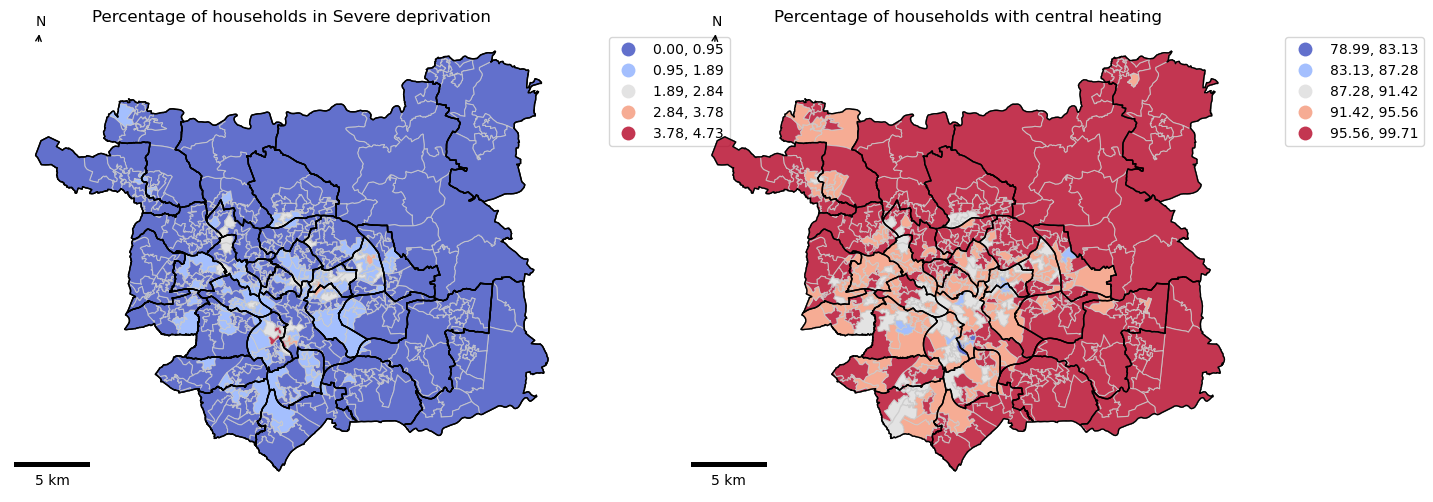

In [34]:
# Create two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # Create a figure with 1 row and 2 columns of subplots

# Define column names and titles for each subplot
columns = ['% Severe deprivation', '% Have central heating']  # Define column names for data to be plotted
titles = ['Percentage of households in Severe deprivation', 'Percentage of households with central heating']  # Define titles for each subplot

# Loop through subplots and plot respective variables
for i, column, title in zip(range(2), columns, titles):  # Iterate through the two subplots
    merged_data.plot(column=column,  # Plot the specified column from merged_data DataFrame
                     scheme='equalinterval',  # Choose classification scheme for choropleth map
                     cmap='coolwarm',  # Choose colormap for the plot
                     linewidth=0.8,  # Set the linewidth for boundary lines
                     ax=axs[i],  # Plot on the i-th subplot
                     edgecolor='0.8',  # Set the color for boundary lines
                     alpha=0.8,  # Set the transparency level
                     legend=True,  # Display legend
                     legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})  # Set legend position
    axs[i].set_title(title)  # Set title for each subplot

    # Overlay Leeds wards as boundary layer on top of OAs
    leeds_wards.plot(ax=axs[0], color='none', alpha=1)  # Overlay Leeds wards on the first subplot
    leeds_wards.plot(ax=axs[1], color='none', alpha=1)  # Overlay Leeds wards on the second subplot

    # Adding scale bar and north arrow for each subplot
    ax = axs[i]  # Set the current axis
    scalebar = ScaleBar(1, location='lower left')  # Create a scale bar
    ax.add_artist(scalebar)  # Add scale bar to the subplot
    ax.annotate('N', xy=(0.05, 0.97), xycoords='axes fraction',  # Annotate North arrow
                xytext=(0.045, 1.01), textcoords='axes fraction',
                arrowprops=dict(color='black', arrowstyle='<-'))  # Set properties for the arrow

# Customize plots
for ax in axs:  # Iterate through each subplot
    ax.set_xlabel('Longitude', fontsize=12)  # Set label for x-axis
    ax.set_ylabel('Latitude', fontsize=12)  # Set label for y-axis
    ax.axis('off')  # Hide axis

plt.show()  # Display the plot

### Pattern, visualization choices and target audience for the choropleth Map
The sectiongivess a comprehensive overview of the pattern observed in the choropleth map and the visualization choices made to effectively convey the relationship between severe deprivation and central heating availability across Leeds LSOAs

.
Pattern Observed
The choropleth map reveals a clear negative correlation between severe deprivation and central heating availability. Areas characterized by severe deprivation tend to exhibit lower central heating availability. This pattern agrees with (Liddell et al., 2012) who pointed that severe deprivation is one of the factors that lead to energy poverty. The subplot representing severe deprivation shows that LSOAs in the central and southwest regions of Leeds have higher percentages of households experiencing severe deprivation. On the contrary, the subplot depicting central heating availability indicates that these same areas experience lower percentages of households with access to central heating. However, areas in the eastern and northern parts of the study area exhibit higher percentages of households with central heating availability but lower percentages of households experiencing severe deprivatio

n. 
Visualization choices
The decision to use two subplots was driven by the desire to clearly display two distinct variables on the same choropleth map as attempts to represent both variables using hue and saturation resulted in an unclear and aesthetically unpleasing visualization. The 'coolwarm' continuous color map was chosen as it provides a colorblind-friendly color ramp, effectively highlighting variations in the distribution of severe deprivation and central heating availability across Leeds. Essential map elements such as legends, titles, north arrow, and scale bar enhance readability and understanding of choropleth maps (Crampton, 2010), and these were included and customized using functions from the Matplotlib package. Finally, Overlaying Leeds wards boundaries on top of the LSOAs shapefile provided additional context by illustrating the spatial distribution of the mapped variables across different geographical units, further enhancing the interpretability of the


 map.
Intended audience
This visualization is well-targeted for policymakers. The use of two subplots, a clear color-blind color scheme, and essential map elements enhance the accessibility and interpretability of the visualization (Zollmann et al., 2012). Policymakers with varying levels of technical expertise can easily interpret the map and derive actionable insights. They can quickly grasp the spatial distribution of central heating and severe deprivation and understand the areas that are most affected by energy poverty for immediate attention and resource allocation. Overlaying Leeds wards boundaries provides additional context to the spatial distribution of variables, enabling policymakers to consider broader geographical factors when formulating policies. 
map.


### References

Bai, C., Zhan, J., Wang, H., Yang, Z., Liu, H., Liu, W., Wang, C., Chu, X. and Teng, Y. 2023. Heating choices and residential willingness to pay for clean heating: Evidence from a household survey in rural China. Energy Policy. 178, p113617.

Berinato, S. 2023. Good Charts, Updated and Expanded: The HBR Guide to Making Smarter, More Persuasive Data Visualizations.  Harvard Business Press.

Crampton, J.W. 2010. Mapping: A critical introduction to cartography and GIS.  John Wiley & Sons.

Liddell, C., Morris, C., McKenzie, S. and Rae, G. 2012. Measuring and monitoring fuel poverty in the UK: National and regional perspectives. Energy policy. 49, pp.27-32.

National Statistical Office. 2011. Infuse 2011 Population Statistics. [Online]. [Accessed on 03 May 2024]. Available from InFuse 2011 (ukdataservice.ac.uk)

National Statistical Office. 2023. Census 2021: how homes are heated in your area. [Online]. [Accessed on 05 May 2024]. Available from https://www.ons.gov.uk/peoplepopulationandcommunity/housing/articles/census2021howhomesareheatedinyourarea/20

23-01-05. 
National Statistics Office. 2012. Households by deprivation dimensions.Accessed. [Retrieved on 05Available]. Retrieved from  Households by deprivation dimensions - Office for National Statistics


Office for National Statistics (2011). Open Georaphy Portal. [Online]. [Accessed on 03 May 2024]. Available from Open Geography Portal (statistics.gov.uk)

Wang, Y., Han, F., Zhu, L., Deussen, O. and Chen, B. 2017. Line graph or scatter plot? automatic selection of methods for visualizing trends in time series. IEEE transactions on visualization and computer graphics. 24(2), pp.1141-1154.

Zollmann, S., Schall, G., Junghanns, S. and Reitmayr, G. 2012. Comprehensible and interactive visualizations of GIS data in augmented reality. In: Advances in Visual Computing: 8th International Symposium, ISVC 2012, Rethymnon, Crete, Greece, July 16-18, 2012, Revised Selected Papers, Part I 8: Springer, pp.675-685.
pp.675-685.
